**STEP 1**
First we take the data set of microsoft stocks starting from 1986 and create a dataframe using pandas library

In [ ]:
# Step 1 Creating data frame

import pandas as pd  # importing pandas and giving it and alias pd

df = pd.read_csv('https://raw.githubusercontent.com/ramkrishna1729/Data-Sheet/main/MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [ ]:
df = df[['Date', 'Close']]
df


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9078,2022-03-18,300.429993
9079,2022-03-21,299.160004
9080,2022-03-22,304.059998
9081,2022-03-23,299.489990


In [ ]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9078    2022-03-18
9079    2022-03-21
9080    2022-03-22
9081    2022-03-23
9082    2022-03-24
Name: Date, Length: 9083, dtype: object

**Step 2 Preprocessing of data**

In [ ]:
#Converting date string to integer

import datetime   # datetime module is used for using dates as date objects

def str_to_datetime(s):   # str_to_datetime function takes a single argument s, which is expected to be a date string in the 'YYYY-MM-DD' format.
  split = s.split('-')    # line splits the input string s at hyphens ('-') to extract the year, month, and day components.
  year, month, day = int(split[0]), int(split[1]), int(split[2]) # components are converted from strings to integers and assigned to the variables year, month, and day.
  return datetime.datetime(year=year, month=month, day=day) #This line creates a datetime object using the extracted year, month, and day components and returns it.

datetime_object = str_to_datetime('1986-03-19') #passing the arguements
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9078,2022-03-18,300.429993
9079,2022-03-21,299.160004
9080,2022-03-22,304.059998
9081,2022-03-23,299.489990


In [ ]:
#line selects the 'Date' column from the DataFrame df and applies the str_to_datetime function to each element in the column.
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-32-d985addd2447>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9078   2022-03-18
9079   2022-03-21
9080   2022-03-22
9081   2022-03-23
9082   2022-03-24
Name: Date, Length: 9083, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date') #This line removes the 'Date' column from the DataFrame df and returns it as a pandas Series
# and uses its values as the new index for the DataFrame.
df


,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-03-18,300.429993
2022-03-21,299.160004
2022-03-22,304.059998


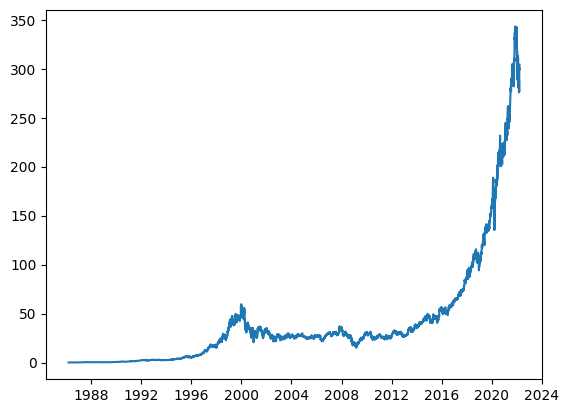

In [ ]:
#Step 3 - Data Visualization

import matplotlib.pyplot as plt
plt.plot(df.index, df['Close']) #plotting date in x-axis and closing value at y-axis

**STEP 4 -creating a rolling windows**

Rolling windows are a versatile tool in financial data analysis that help address the temporal nature of financial data, support feature engineering, facilitate modeling and prediction tasks, and enable various types of financial analysis

In [ ]:
import numpy as np

#This function creates a new dataframe ( ret_df) containing rolling window of financial data
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3): #func takes df of Finacial data, Starting date, End date , size of the rollin window

# Date Conversion - converting first_date_str and last_date_str to first_date and last_date objects
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

#Intialization of variables
  target_date = first_date

  dates = []           # dates will store target dates

  X, Y = [], []        # X- will store historical data and Y - will target values

  last_time = False     # flag to check weather the last date is reached or not


            # Main Loop
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1) # the function extracts first date - last date of dataframe
    #n+1 ensures that the rolling window includes current obeservation and previous observations

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy() #extracting closing value frm df_subset and storing it values (numpy array)

    #Spliting the values into historical data (X) and target value (Y) for each window.
    x = values[:-1]   # selects all closing values except the last one
    y = values[-1]    # selects only the last element (target one )

#The historical data for each window is stored in the X list, and the target values are stored in the Y list.
    dates.append(target_date)
    X.append(x)
    Y.append(y)

#Date Calculation
#It calculates the next target date by adding 7 days to the current target date until it reaches the last_date.

    #this line extracts the target date from the week
    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]  # It does this by selecting rows from target_date to target_date + 7 days.

    next_datetime_str = str(next_week.head(2).tail(1).index.values[0]) #extracting date from the index of subset "next_week"
    next_date_str = next_datetime_str.split('T')[0]   #converts the index to string and spliting it to get the date part int the format

    year_month_day = next_date_str.split('-')  #this code splits the date str to year,month and day components
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year)) #creating a datetime objects 'next_date'

    if last_time:  #condition checks weather last time is true
      break

    target_date = next_date

    if target_date == last_date: #checks weather the target_date has reached last_time or not
      last_time = True            #sets last_time as true

  ret_df = pd.DataFrame({})    #ceating empty data frame
  ret_df['Target Date'] = dates   #adding target date column and assigning values from the date list

#Preparing historical date columns
  X = np.array(X)                   # converting 'X' historical dates into numpy array
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]    #assigning values to the new column target in the ret_df

  ret_df['Target'] = Y  #assigning values to the new column 'Target' from 'Y' list

  return ret_df

# Start day second time around: '2021-03-25'

windowed_df = df_to_windowed_df(df,'2021-03-25','2022-03-23', n=3) # using only 1 year data
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


**Step 5 - Processing windowed_df data and preparing it for further analysis by the machine learning models**

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):

  df_as_np = windowed_dataframe.to_numpy()  # converts rolling finacial ( windowed_df) data into numpy array

  dates = df_as_np[:, 0]        # Extracts the first column of a numpy array which contains the dates of the finacial data

  middle_matrix = df_as_np[:, 1:-1]     #extracting data from from numpy array , except first (0) and last columns (-1)
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))  # reshaping the middle_matrix to 3d array -nof windows ,window , size , 1

  Y = df_as_np[:, -1]      #storing target values extracted from the last column of numpt array

  return dates, X.astype(np.float32), Y.astype(np.float32) #returning 'dates','X' and 'Y' also casting the each value in df into 32 bits float

dates, X, y = windowed_df_to_date_X_y(windowed_df) #function is returned

dates.shape, X.shape, y.shape  #printing shapes of array dates ,X,Y

((252,), (252, 3, 1), (252,))

**STEP 6** - Spliting data into training , texting and validation

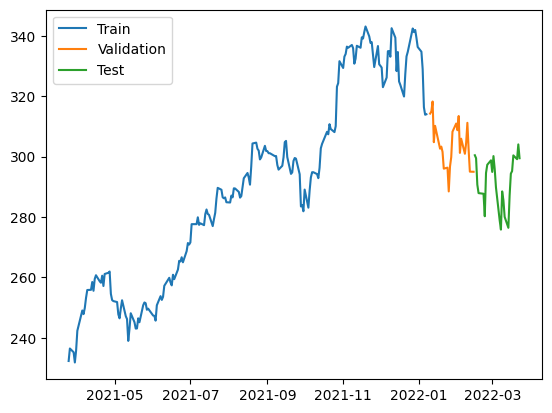

In [ ]:
q_80 = int(len(dates) * .8)     # 80 % of dates array
q_90 = int(len(dates) * .9)     # 90 % of dates array

#The data (dates, X, and y) is divided into three sets: training, validation, and test sets.

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]  # train set contains 80 % of data
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90] # Validation test contains 10 % of data
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:] # test contains 10 % of the data

# Plotting train , test and validation
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test']) # to differntiate between data

**STEP 7 - Building and Training a sequential neural network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

#1. Creating a sequential model - linear stack of layers ( input layer , hidden layer ,Output layer )

model = Sequential([layers.Input((3, 1)),      #INPUT LAYER -indicating each input sample has 3 features for 1 dataset
                    layers.LSTM(64),           # inducing LSTM model with 64 (neurons) units

                    layers.Dense(32, activation='relu'), # HIDDEN LAYER - dense (fully connected) layer with 32 units ( neurons ) and ReLU activation function.
                    layers.Dense(32, activation='relu'), # ,,

                    layers.Dense(1)])             # OUTPUT LAYER -  with a single unit, which is typically used for regression tasks.

#2. Compiling models
model.compile(loss='mse',            # mean squared error
              optimizer=Adam(learning_rate=0.001), #specifying the loss function as Mean Squared Error ('mse'), the optimizer as Adam with a learning rate of 0.001
              metrics=['mean_absolute_error']) # includes Mean Absolute Error as a metrics for evaluation which tells us how much we are off bye

#3. Training the model
model.fit(X_train, y_train, validation_data=(X_val, y_val) , epochs=100) #validation date = tuple of x_val  and y_val and running it 100 times

Epoch 1/100
7/7 [==============================] - 4s 97ms/step - loss: 84212.6484 - mean_absolute_error: 288.4492 - val_loss: 91783.3438 - val_mean_absolute_error: 302.8702
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 83846.3281 - mean_absolute_error: 287.8142 - val_loss: 91422.3984 - val_mean_absolute_error: 302.2737
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 83456.7109 - mean_absolute_error: 287.1381 - val_loss: 90925.3203 - val_mean_absolute_error: 301.4504
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 82961.8281 - mean_absolute_error: 286.2719 - val_loss: 90375.8516 - val_mean_absolute_error: 300.5376
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 82387.6016 - mean_absolute_error: 285.2668 - val_loss: 89658.6719 - val_mean_absolute_error: 299.3421
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 81608.5078 - mean_absolute_error: 283.8955 - val_loss: 88679.

**Step 8 - predicting values using trained model and visualizing**

7/7 [==============================] - 0s 2ms/step


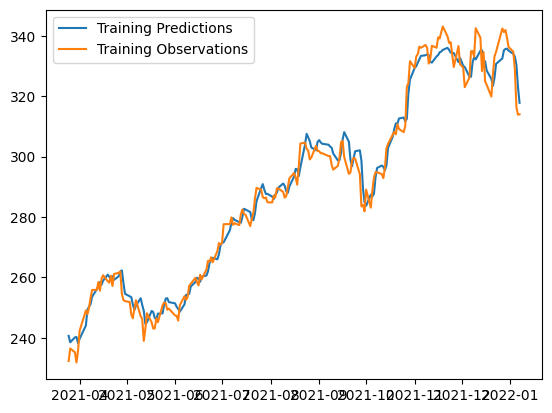

In [ ]:
train_predictions = model.predict(X_train).flatten() # predicting values based X train and using flatten to convert it in a 1D array

plt.plot(dates_train, train_predictions) # plotting dates_train on x-axis
plt.plot(dates_train, y_train)  #plotting dates_train vs actual training data

plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 36ms/step


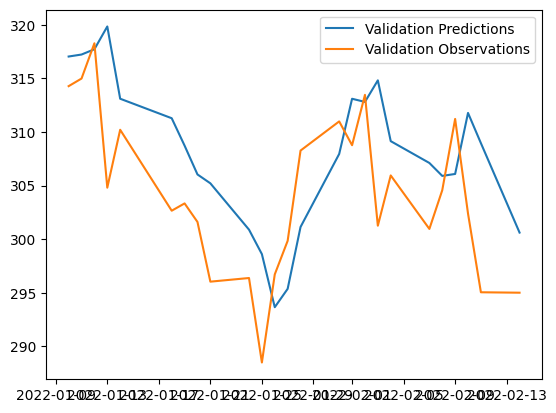

In [ ]:
# Making prediction on the validation data along with the actual validation data

val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


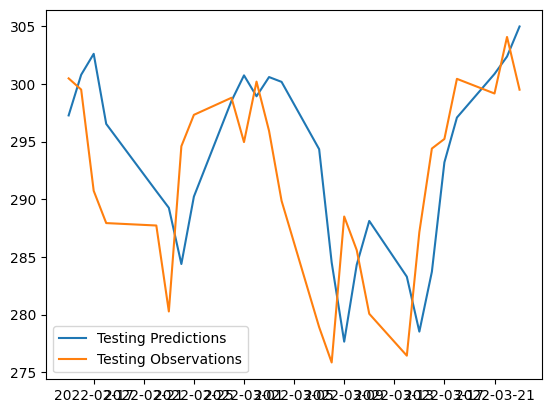

In [ ]:
# Making prediction on the test data along with the actual test data
test_predictions = model.predict(X_test).flatten()
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

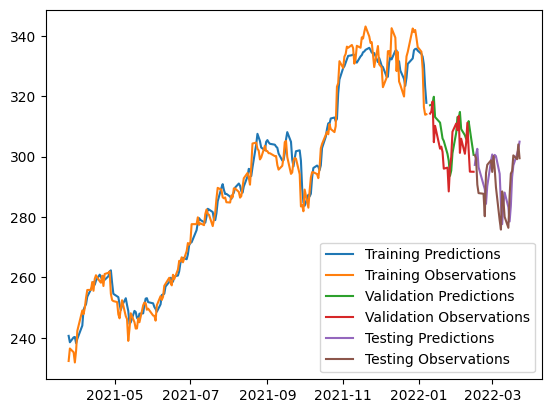

In [ ]:
#PLotting train, validaton , test prediction with actual data sets
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

The **predicted** vs the **observation** is very close to each other , all of the prediction is based on the data of 3 days before the target date .

On the basis of the observation of the trend and the micro scale on per day should I sell or buy.

In [ ]:
#Making recursive prediction from trained neural network model
from copy import deepcopy  #creating a deep copy of the object ensuring that the orignal object is un altered

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])  # Concatenating validation and test dates

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1]) #creating copy of last window of the historical data
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)  # next prediction is appended to recursive prediction
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


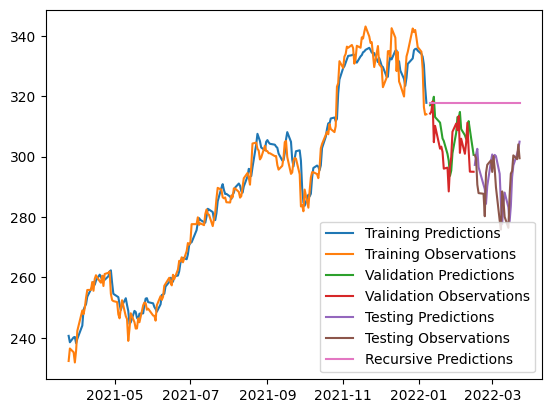

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

The flat pink line is showing **Recursive prediction** means that the model has no idea about about the  future prediction .